### 1 . Thực hiện với data after_preprocess_no_categorical.csv

In [1]:
import pandas as pd

df_no = pd.read_csv("../data/after_preprocess_no_categorical.csv")

df_no.head()

,BMI,Weight (kg),Calories,Height (m),Burns Calories (per 30 min),Water_Intake (liters),Fat_Percentage
0,-0.007712,-0.407549,-0.403077,-0.811571,-0.045632,-1.864510,26.800377
1,-0.215145,-0.826017,-0.825681,-1.362623,0.408037,-1.203034,27.655021
2,-0.562857,-0.704633,-0.768472,-0.417962,0.484893,-1.236108,24.320821
3,1.123469,0.939010,1.167388,-0.181796,0.236589,-0.210821,32.813572
4,-1.506005,-1.014469,-1.023142,1.235196,-0.456983,0.467191,17.307319


Chọn random_state = 15 vì ngày thực hiện là ngày 15

In [2]:
from sklearn.model_selection import train_test_split

X = df_no.drop("Fat_Percentage", axis=1)
y = df_no['Fat_Percentage']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
) 

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from tqdm import tqdm

r_train = []
mse_train = []

r_test = []
mse_test = []

order = [i+1 for i in range(5)]
for i in tqdm(order):
    model = Pipeline(steps=[
            ("poly", PolynomialFeatures(degree=i, include_bias=False)),
            ("reg", LinearRegression())
        ])
    
    model.fit(x_train, y_train)
    r_train.append(model.score(x_train, y_train))
    r_test.append(model.score(x_test, y_test))

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    mse_train.append(mean_squared_error(y_pred_train, y_train))
    mse_test.append(mean_squared_error(y_pred_test, y_test))

100%|██████████| 5/5 [00:00<00:00,  7.16it/s]


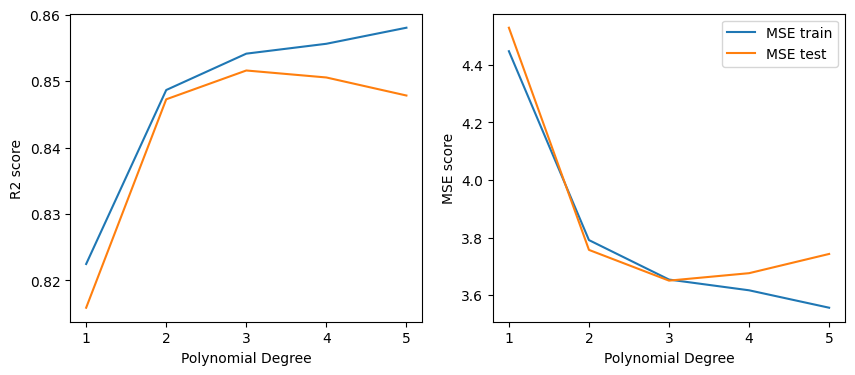

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(order, r_train, label='train')
ax[0].plot(order, r_test, label='test')
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('R2 score')

ax[1].plot(order, mse_train, label='train')
ax[1].plot(order, mse_test, label='test')
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('MSE score')

plt.legend()

Nhìn vào hình trên có thể thấy rằng bậc tốt nhất cho bài toán này là bậc 3

In [5]:
model = Pipeline(steps=[
        ("poly", PolynomialFeatures(degree=3, include_bias=False)),
        ("reg", LinearRegression())
    ])

model.fit(x_train, y_train)

print("\nIntercept (w0):", model.named_steps["reg"].intercept_)
print("\nCoefficients (w1..wm):")
print(model.named_steps["reg"].coef_)


Intercept (w0): 26.338912801927698

Coefficients (w1..wm):
[-1.87732990e+01  2.67258076e+01 -8.66084813e-01 -1.32222189e+01
  1.41418627e-01 -8.58890073e-02 -2.86251870e+01  4.55223429e+01
  6.22379227e+00 -1.54247916e+01  9.42941908e+00  3.04446145e+01
 -1.59361171e+01 -7.37672010e+00  4.51839870e+00 -9.80054446e+00
 -3.22313416e+01  4.24648540e-01  3.46657296e+00 -1.55691662e-01
 -1.51067767e-01  1.41233934e+00  5.23784177e+00  1.66802360e+01
  3.06889279e-02 -2.96693309e-02 -1.22346443e-02 -4.11165798e+00
  1.37220684e+01 -1.78232422e-01 -1.31410620e+01  9.39035984e-01
  2.22286658e+00 -1.86582939e+01  5.56858842e+00  2.17169340e+01
 -1.32484691e+00 -5.48159112e+00 -2.44217833e+00  1.34516475e+00
 -5.00930124e-01  7.47229637e-01 -6.73667815e+00  2.19011315e+00
  6.22984484e+00  1.10635393e-01 -2.43318483e-01  1.54519599e-01
  7.43109558e+00 -9.85555716e-01 -1.23183188e+01  3.50835705e-01
  2.88476273e+00 -2.38275906e+00  2.92216284e+00  3.84029729e-01
  1.04325835e-01  6.99452270e+

Thực hiện cross-validation

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=15)

r2_scores = []
mse_scores = []

for train_idx, val_idx in kf.split(X):
    X_train = X.iloc[train_idx]
    X_val   = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val   = y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    r2_scores.append(model.score(X_val, y_val))
    mse_scores.append(mean_squared_error(y_pred, y_val))


print("R2 score từng fold:", r2_scores)
print("MSE score từng fold:", mse_scores)

R2 score từng fold: [0.8516011260616819, 0.8577161834894662, 0.8513608685151113, 0.8518197209644791, 0.8504623579137547]
MSE score từng fold: [3.6502650410099773, 3.61189800059359, 3.6811824064285403, 3.718168949087788, 3.7288536467296236]


In [ ]:
r2_scores = pd.Series(r2_scores)
print("Độ lệch chuẩn của R2 : ", r2_scores.std())
print("Trung bình của R2 : ", r2_scores.mean())

mse_scores = pd.Series(mse_scores)
print("Độ lệch chuẩn của MSE : ", mse_scores.std())
print("Trung bình của MSE : ", mse_scores.mean())

Độ lệch chuẩn của R2:  0.002910608297222793
Trung bình của R2:  0.8525920513888987
Độ lệch chuẩn của MSE:  0.0483436675057946
Trung bình của MSE:  3.678073608769904


### 2 . Thực hiện với data after_preprocess_with_categorical.csv

In [8]:
df_with = pd.read_csv("../data/after_preprocess_with_categorical.csv")

df_with.head()

,BMI,Weight (kg),Calories,Height (m),Burns Calories (per 30 min),Water_Intake (liters),Gender,Difficulty Level,Burns_Calories_Bin,ohe__Workout_Type_Cardio,...,pull-up bar,barbell,low bar,trx,bench,sturdy surface,kettlebell,platform,dumbbell,Fat_Percentage
0,-0.007712,-0.407549,-0.403077,-0.811571,-0.045632,-1.864510,1,2.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,26.800377
1,-0.215145,-0.826017,-0.825681,-1.362623,0.408037,-1.203034,0,1.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,27.655021
2,-0.562857,-0.704633,-0.768472,-0.417962,0.484893,-1.236108,0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,24.320821
3,1.123469,0.939010,1.167388,-0.181796,0.236589,-0.210821,0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,32.813572
4,-1.506005,-1.014469,-1.023142,1.235196,-0.456983,0.467191,1,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,17.307319


In [9]:
X = df_with.drop("Fat_Percentage", axis=1)
y = df_with['Fat_Percentage']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
) 

In [22]:
from sklearn.compose import ColumnTransformer

num_cols = list(df_no.drop("Fat_Percentage", axis=1).columns)
cate_cols = [cols for cols in df_with.drop("Fat_Percentage", axis=1).columns if cols not in num_cols]

r_train = []
mse_train = []

r_test = []
mse_test = []

order = [i+1 for i in range(5)]
for i in tqdm(order):
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", PolynomialFeatures(degree=i, include_bias=False), num_cols),
            ("cat", "passthrough", cate_cols)
        ]
    )
    model = Pipeline(steps=[
            ("preprocess", preprocessor),
            ("reg", LinearRegression())
        ])
    
    model.fit(x_train, y_train)
    r_train.append(model.score(x_train, y_train))
    r_test.append(model.score(x_test, y_test))

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    mse_train.append(mean_squared_error(y_pred_train, y_train))
    mse_test.append(mean_squared_error(y_pred_test, y_test))

100%|██████████| 5/5 [00:01<00:00,  3.77it/s]


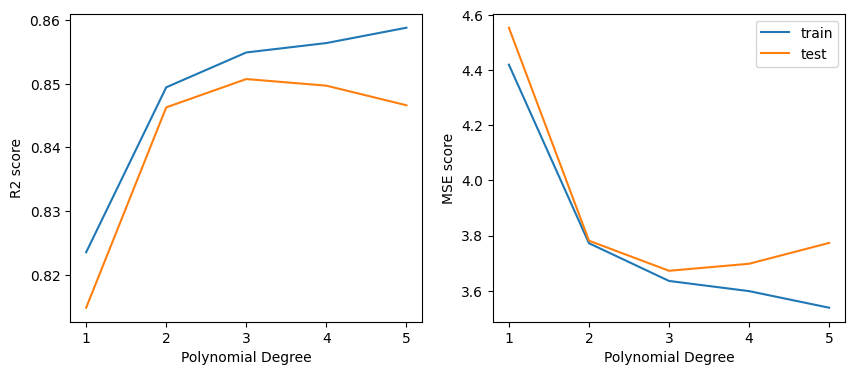

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(order, r_train, label='train')
ax[0].plot(order, r_test, label='test')
ax[0].set_xlabel('Polynomial Degree')
ax[0].set_ylabel('R2 score')

ax[1].plot(order, mse_train, label='train')
ax[1].plot(order, mse_test, label='test')
ax[1].set_xlabel('Polynomial Degree')
ax[1].set_ylabel('MSE score')

plt.legend()

Nhìn vào hình trên có thể thấy rằng bậc tốt nhất cho bài toán này là bậc 3

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", PolynomialFeatures(degree=3, include_bias=False), num_cols),
        ("cat", "passthrough", cate_cols)
    ]
)
model = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("reg", LinearRegression())
])

model.fit(x_train, y_train)

print("\nIntercept (w0):", model.named_steps["reg"].intercept_)
print("\nCoefficients (w1..wm):")
print(model.named_steps["reg"].coef_)


Intercept (w0): 26.436489717731657

Coefficients (w1..wm):
[-1.80012238e+01  2.59292739e+01 -8.74179084e-01 -1.28107682e+01
  1.81233196e-02 -6.36429301e-02 -2.15350104e+01  3.22854231e+01
  6.22543535e+00 -8.86334621e+00  9.97451174e+00  3.30795424e+01
 -9.88044334e+00 -7.37031931e+00 -1.33035659e+00 -1.03954772e+01
 -3.50311272e+01  4.19810668e-01  3.46422685e+00 -1.30403582e-01
 -1.56423068e-01  2.83310796e+00  5.54099632e+00  1.81223693e+01
 -1.30780048e-02 -3.21424668e-02 -1.19103299e-02 -4.99955051e+00
  1.70449337e+01 -6.56386673e-01 -1.38197023e+01  8.59075581e-01
  2.20110304e+00 -2.27997997e+01  6.83287394e+00  2.50121491e+01
 -1.17561595e+00 -5.48845813e+00 -2.57972662e+00  7.99081541e-01
 -4.62142052e-01  8.08869793e-01 -7.21764755e+00  2.13711583e+00
  6.49025405e+00  1.18498000e-01 -2.40561061e-01  1.45122022e-01
  9.12236740e+00 -1.75283033e+00 -1.47977354e+01  2.88185537e-01
  2.93591430e+00 -2.25204280e+00  3.62163015e+00  3.41988592e-01
 -4.86760932e-04  8.04433201e+

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state=15)

r2_scores = []
mse_scores = []

for train_idx, val_idx in kf.split(X):
    X_train = X.iloc[train_idx]
    X_val   = X.iloc[val_idx]
    y_train = y.iloc[train_idx]
    y_val   = y.iloc[val_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    r2_scores.append(model.score(X_val, y_val))
    mse_scores.append(mean_squared_error(y_pred, y_val))


print("R2 score từng fold:", r2_scores)
print("MSE score từng fold:", mse_scores)

R2 score từng fold: [0.8507173735599924, 0.8572032015412743, 0.8510052370099417, 0.8516430962531273, 0.8491744186600374]
MSE score từng fold: [3.6720032845438406, 3.624920131419536, 3.6899899420143827, 3.722600851373735, 3.7609695535741374]


In [ ]:
r2_scores = pd.Series(r2_scores)
print("Độ lệch chuẩn của R2 : ", r2_scores.std())
print("Trung bình của R2 : ", r2_scores.mean())

mse_scores = pd.Series(mse_scores)
print("Độ lệch chuẩn của MSE : ", mse_scores.std())
print("Trung bình của MSE : ", mse_scores.mean())

Độ lệch chuẩn của R2:  0.0030743334342629622
Trung bình của R2:  0.8519486654048747
Độ lệch chuẩn của MSE:  0.05141703827261329
Trung bình của MSE:  3.6940967525851263


### Nhận xét : 

    - Đúng như khi EDA thì khi thêm các biến categorical không hề khiến mô hình dự đoán tốt hơn. Khi thực hiện cross-validation với k-fold = 5 thì kết quả của no_cate và with_cate không chênh lệch quá nhiều.
    - Nhận xét về độ lệch chuẩn R2 trong 5 fold 